In [4]:
## CNN with 3 Convolutional Layers

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

In [6]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')


In [7]:
batch_size = 512

In [8]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [9]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [10]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


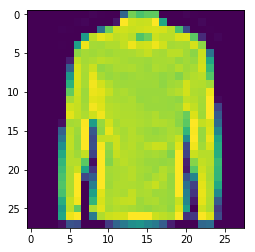

In [13]:
plt.imshow(X_train[1, :].reshape((28, 28)))

In [14]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [15]:
# CNN with 3 Convolutional Layers

In [16]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')])


In [17]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [18]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 107s 2ms/step - loss: 0.9339 - acc: 0.6526 - val_loss: 0.5534 - val_acc: 0.7863
Epoch 2/10
48000/48000 [==============================] - 105s 2ms/step - loss: 0.5553 - acc: 0.7890 - val_loss: 0.4435 - val_acc: 0.8358
Epoch 3/10
48000/48000 [==============================] - 103s 2ms/step - loss: 0.4776 - acc: 0.8221 - val_loss: 0.3985 - val_acc: 0.8570
Epoch 4/10
48000/48000 [==============================] - 90s 2ms/step - loss: 0.4268 - acc: 0.8425 - val_loss: 0.3546 - val_acc: 0.8758
Epoch 5/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.3944 - acc: 0.8564 - val_loss: 0.3250 - val_acc: 0.8848
Epoch 6/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3726 - acc: 0.8614 - val_loss: 0.3084 - val_acc: 0.8909
Epoch 7/10
48000/48000 [==============================] - 96s 2ms/step - loss: 0.3560 - acc: 0.8688 - val_loss: 0.2956 - val_

In [19]:
cnn2.optimizer.lr = 0.0001

In [20]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 848us/step - loss: 0.3025 - acc: 0.8873 - val_loss: 0.2638 - val_acc: 0.9045
Epoch 2/10
48000/48000 [==============================] - 41s 848us/step - loss: 0.2929 - acc: 0.8908 - val_loss: 0.2605 - val_acc: 0.9066
Epoch 3/10
48000/48000 [==============================] - 41s 846us/step - loss: 0.2794 - acc: 0.8956 - val_loss: 0.2546 - val_acc: 0.9078
Epoch 4/10
48000/48000 [==============================] - 41s 855us/step - loss: 0.2763 - acc: 0.8975 - val_loss: 0.2478 - val_acc: 0.9118
Epoch 5/10
48000/48000 [==============================] - 41s 855us/step - loss: 0.2725 - acc: 0.8989 - val_loss: 0.2482 - val_acc: 0.9077
Epoch 6/10
48000/48000 [==============================] - 41s 860us/step - loss: 0.2628 - acc: 0.8998 - val_loss: 0.2414 - val_acc: 0.9127
Epoch 7/10
48000/48000 [==============================] - 41s 863us/step - loss: 0.2603 - acc: 0.9031 - val_loss: 0.

In [21]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25669838305711745
Test accuracy: 0.9059


In [23]:
# Data Augmentation

In [24]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)


In [25]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 50s 538ms/step - loss: 0.4376 - acc: 0.8340 - val_loss: 0.3504 - val_acc: 0.8695
Epoch 2/50
93/93 [==============================] - 46s 490ms/step - loss: 0.3976 - acc: 0.8517 - val_loss: 0.3414 - val_acc: 0.8722
Epoch 3/50
93/93 [==============================] - 44s 472ms/step - loss: 0.3918 - acc: 0.8518 - val_loss: 0.3265 - val_acc: 0.8761
Epoch 4/50
93/93 [==============================] - 44s 472ms/step - loss: 0.3657 - acc: 0.8625 - val_loss: 0.3176 - val_acc: 0.8833
Epoch 5/50
93/93 [==============================] - 44s 472ms/step - loss: 0.3642 - acc: 0.8650 - val_loss: 0.3028 - val_acc: 0.8891
Epoch 6/50
93/93 [==============================] - 44s 473ms/step - loss: 0.3571 - acc: 0.8664 - val_loss: 0.3104 - val_acc: 0.8821
Epoch 7/50
93/93 [==============================] - 44s 473ms/step - loss: 0.3528 - acc: 0.8680 - val_loss: 0.3076 - val_acc: 0.8894
Epoch 8/50
93/93 [==============================] - 44s 473ms/step - 

In [26]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.246803956669569
Test accuracy: 0.9083


In [27]:
cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________